In [26]:
using CombinatorialSpaces
using DifferentialEquations
using CairoMakie
using GeometryBasics

AbstractPlotting.inline!(true)

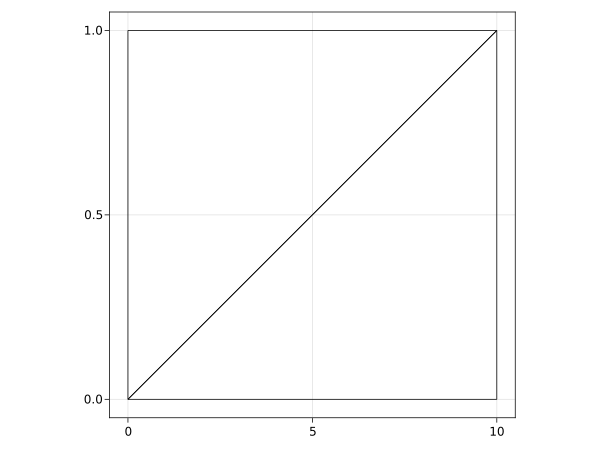

In [39]:
# Dimensional constants for the complex
w = 10
h = 1
num_points = 2
total_points = num_points*num_points

x_vals = range(0, w, length=num_points)
y_vals = range(0, h, length=num_points)

# Helper functions for keeping indexes straight
ind(x,y) = x + (y-1)*(num_points)
tri_ind(x,y) = x + (y-1)*(num_points-1)*2

# Initialize embedded complex
s = EmbeddedDeltaSet2D{Bool, Point{3, Float64}}()

# Define point coordinates for each point in the complex
points = Array{Point{3, Float64},1}(undef, total_points)
j = 0:10:0.90909
k = 1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0
for x in 1:num_points
  for y in 1:num_points
    points[ind(j,k)]=Point{3,Float64}(x_vals[j],y_vals[k],0)
  end
end
add_vertices!(s, total_points, point=points)

# Define the connections between points (surfaces) as triangles that cover the surface
for y in 1:(num_points-1)
    for x in 1:(num_points-1)
        if (x+y) % 2 == 1
            glue_sorted_triangle!(s, ind(x,y), ind(x+1,y), ind(x,y+1))
            glue_sorted_triangle!(s, ind(x+1,y+1), ind(x,y+1), ind(x+1,y))
        else
            glue_sorted_triangle!(s, ind(x+1,y+1), ind(x,y+1), ind(x,y))
            glue_sorted_triangle!(s, ind(x,y), ind(x+1,y+1), ind(x+1,y))
        end
    end
end
orient_component!(s, 1, true)

# Draw the generated mesh
# sd = EmbeddedDeltaDualComplex2D{Bool, Float64, Point{3,Float64}}(s)
# subdivide_duals!(sd, Barycenter())
# star0 = ⋆(0,sd)
fig, ax, du = wireframe(s)
ax.aspect = AxisAspect(1)
fig